In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 불필요한 경고문 생략(선택)
import warnings
warnings.filterwarnings('ignore')

# 모든 컬럼 출력설정(선택)
pd.set_option('display.max_columns', None)

# 데이터 로드
data = pd.read_csv('C:/Users/goodm/Downloads/Churn_Modelling.csv',index_col=0)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [68]:
# data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10002 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10002 non-null  int64  
 1   Surname          10002 non-null  object 
 2   CreditScore      10002 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10002 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10002 non-null  int64  
 7   Balance          10002 non-null  float64
 8   NumOfProducts    10002 non-null  int64  
 9   HasCrCard        10001 non-null  float64
 10  IsActiveMember   10001 non-null  float64
 11  EstimatedSalary  10002 non-null  float64
 12  Exited           10002 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.1+ MB


In [74]:
# 결측치 확인 및 제거(4개 행 제거)

data.isnull().sum()
nan_data = data.dropna()


RowNumber
1        False
2        False
3        False
4        False
6        False
         ...  
9998     False
9999     False
9999      True
10000    False
10000     True
Length: 9998, dtype: bool

In [76]:
# 중복 값 행 검색 및 행 삭제
nan_data[nan_data.duplicated()]

new_data = nan_data[~nan_data.duplicated()]

new_data
new_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,1.569095e+07,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782
std,7.192840e+04,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562855e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,1.575323e+07,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


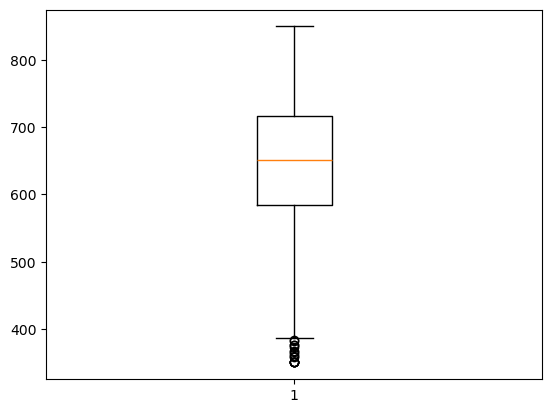

In [77]:
# RAW EDA : 각 지표 별 그래프 작성 및 확인

plt.boxplot(new_data['CreditScore'])
plt.show() #CreditScore에서 너무 작은 값 다수 존재, 해당 인원들의 이탈여부 확인 예정

In [78]:
# 위 그래프의 이상치들은 전부 이탈 : 신용 점수가 너무 낮은 인원은 이탈한다 볼 수 있다.
IQR = new_data['CreditScore'].quantile(q=0.75) - new_data['CreditScore'].quantile(q=0.25)
min = new_data['CreditScore'].quantile(q=0.25) - 1.5*IQR
print(f"사분위수 이상치 판독 최소값 기준 : {min}")

new_data[new_data['CreditScore'] < min]['Exited']

사분위수 이상치 판독 최소값 기준 : 384.125


RowNumber
8       1
943     1
1194    1
1406    1
1632    1
1839    1
1963    1
2474    1
2580    1
5495    1
8155    1
8724    1
8763    1
9211    1
9357    1
9625    1
Name: Exited, dtype: int64

<Axes: xlabel='Age_Group', ylabel='Balance'>

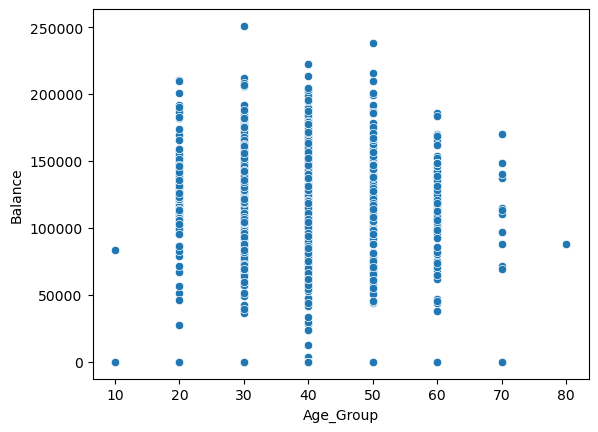

In [79]:
# 연령, 잔고를 통한 고객 상태 확인 : 연령대 그룹화 진행
new_data['Age_Group'] = (new_data['Age'] // 10) * 10
exit_data = new_data[new_data['Exited'] == 1]

sns.scatterplot(data=exit_data, x='Age_Group', y='Balance')

<Axes: >

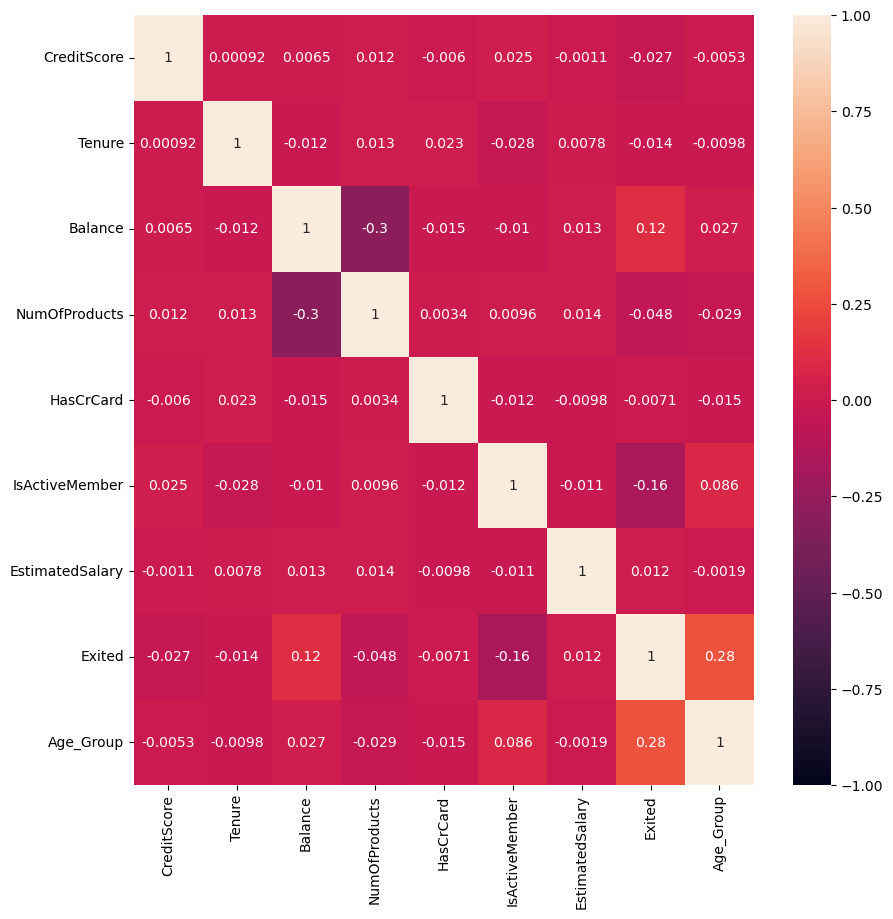

In [80]:
# 목표변수, 범주형 자료 제외하고 변수 간 상관관계 확인, heatmap 사용 : 수치형 자료 사이에는 큰 상관관계 존재 X

int_data = new_data.drop(columns=['CustomerId', 'Surname', 'Geography', 'Gender', 'Age'])
int_data.corr(method='pearson')

import seaborn as sb
plt.figure(figsize=(10,10))
sb.heatmap(int_data.corr(), annot=True, vmin=-1, vmax=1)

In [81]:
# 전체 데이터(수치형)에 대한 로지스틱 회귀 진행
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

def get_att(x):
    # x모델 넣기
    print('클래스 종류', x.classes_)
    print('독립변수 갯수', x.n_features_in_)
    print('들어간 독립변수(x)의 이름', x.feature_names_in_)
    print('가중치', x.coef_)
    print('바이어스', x.intercept_)

def get_metrics(true, pred):
    print('정확도', accuracy_score(true, pred))
    print('f1-score', f1_score(true, pred))

model_lor = LogisticRegression()
X = int_data[['CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Age_Group']]
y_true = int_data[['Exited']]

model_lor.fit(X, y_true)
get_att(model_lor)

y_pred = model_lor.predict(X)
get_metrics(y_true, y_pred)

클래스 종류 [0 1]
독립변수 갯수 7
들어간 독립변수(x)의 이름 ['CreditScore' 'Tenure' 'Balance' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Age_Group']
가중치 [[-4.39114391e-03 -6.39425560e-02  3.82185085e-06 -8.14540527e-03
  -4.46811118e-02 -1.08171643e-06  4.58493780e-02]]
바이어스 [-0.01021573]
정확도 0.790016006402561
f1-score 0.10870488322717622
